In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/samsum-train.csv'
test_path = '/content/drive/MyDrive/samsum-test.csv'
val_path = '/content/drive/MyDrive/samsum-validation.csv'


In [ ]:
import pandas as pd

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
val = pd.read_csv(val_path)

train.head()

,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."


In [ ]:
train.describe()


,id,dialogue,summary
count,14732,14731,14732
unique,14732,14264,14730
top,13818513,"Jimmy: Hey, guess what? My car's completely ka...",Seth's pet Oreo that he got when he was 10 is ...
freq,1,4,2


In [ ]:
train = train.dropna()

In [ ]:
categorical_features = ["dialogue", "summary"]


In [ ]:
import pandas as pd

df_text_length = pd.DataFrame()  # Creating an empty dataframe

categorical_features = ["dialogue", "summary"]  # Define categorical features

# Iterating through features --> Dialogue & Summary
for feat in categorical_features:
    df_text_length[feat] = train[feat].apply(lambda x: len(str(x).split()))  # Counting words for each feature

# Display first few rows of word counts
df_text_length.head()



,dialogue,summary
0,16,9
1,18,10
2,98,14
3,26,18
4,179,27


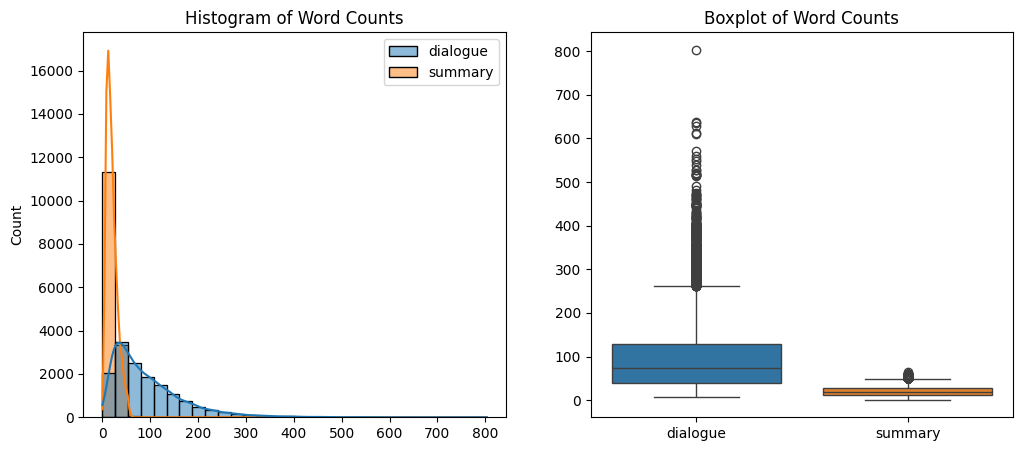

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_text_length, ax=axes[0], bins=30, kde=True)
axes[0].set_title("Histogram of Word Counts")

sns.boxplot(data=df_text_length, ax=axes[1])
axes[1].set_title("Boxplot of Word Counts")

plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=15, stop_words='english')

x = vectorizer.fit_transform(train['dialogue'])

df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

print(df_tfidfvect.head())


        did       don      good     just      know      like        ll  need  \
0  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.658021   0.0   
1  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   0.0   
2  0.341505  0.000000  0.000000  0.00000  0.254484  0.282753  0.797215   0.0   
3  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   0.0   
4  0.219972  0.704896  0.192737  0.33659  0.491757  0.182128  0.171168   0.0   

    ok    really   sure  think  time  yeah  yes  
0  0.0  0.000000  0.753    0.0   0.0   0.0  0.0  
1  0.0  0.000000  0.000    0.0   0.0   0.0  0.0  
2  0.0  0.321109  0.000    0.0   0.0   0.0  0.0  
3  0.0  0.000000  0.000    1.0   0.0   0.0  0.0  
4  0.0  0.000000  0.000    0.0   0.0   0.0  0.0  


In [ ]:
filtered_train = train[train['summary'].str.contains('15 minutes', case=False, na=False)]
filtered_train.head()

,id,dialogue,summary
136,13827893,Kate: I'm here <file_other>\r\nKate: there was...,Kate will meet with Steven in 15 minutes.
428,13811484-1,Jenny: Let's go out to eat.\r\nLucy: That soun...,Jenny and Lucy are going to a Chinese restaura...
570,13818296,Danielle: hey where RU?\r\nJuan: I told u I'd ...,Juan is almost 45 minutes late. He'll be there...
1213,13682296-1,John: I know you will be outraged but I like t...,John and Tyre's neighbour stopped John in the ...
1812,13820691,Madge: are you alive? xD\r\nDorothy: i'm still...,Dorothy is still intoxicated after at least 15...


In [ ]:
def clean_tags(text):
    clean = re.compile('<.*?>')
    clean = re.sub(clean, '', text)

    clean = '\n'.join([line for line in clean.split('\n') if not re.match('.*:\s*$', line)])

    return clean

In [ ]:
import re

def clean_tags(text):
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)

    return text.strip() if text.strip() else "EMPTY_DIALOGUE"

test1 = clean_tags(train['dialogue'].iloc[14727])
test2 = clean_tags(test['dialogue'].iloc[0])

print(test1)
print(test2)

Theresa: 
Theresa: 
Theresa: Hey Louise, how are u?
Theresa: This is my workplace, they always give us so much food here 😊
Theresa: Luckily they also offer us yoga classes, so all the food isn't much of a problem 😂
Louise: Hey!! 🙂 
Louise: Wow, that's awesome, seems great 😎 Haha
Louise: I'm good! Are you coming to visit Stockholm this summer? 🙂
Theresa: I don't think so :/ I need to prepare for Uni.. I will probably attend a few lessons this winter
Louise: Nice! Do you already know which classes you will attend?
Theresa: Yes, it will be psychology :) I want to complete a few modules that I missed :)
Louise: Very good! Is it at the Uni in Prague?
Theresa: No, it will be in my home town :)
Louise: I have so much work right now, but I will continue to work until the end of summer, then I'm also back to Uni, on the 26th September!
Theresa: You must send me some pictures, so I can see where you live :) 
Louise: I will, and of my cat and dog too 🤗
Theresa: Yeeeesss pls :)))
Louise: 👌👌
Theres

In [ ]:
def clean_df(df, cols):
    for col in cols:
        df[col] = df[col].fillna('').apply(clean_tags)
    return df

In [ ]:
train = clean_df(train,['dialogue', 'summary'])
test = clean_df(test,['dialogue', 'summary'])
val = clean_df(val,['dialogue', 'summary'])

In [ ]:
train.tail(3)

,id,dialogue,summary
14729,13819050,John: Every day some bad news. Japan will hunt...,Japan is going to hunt whales again. Island an...
14730,13828395,Jennifer: Dear Celia! How are you doing?\r\nJe...,Celia couldn't make it to the afternoon with t...
14731,13729017,Georgia: are you ready for hotel hunting? We n...,Georgia and Juliette are looking for a hotel i...


In [ ]:
!pip install datasets

from datasets import Dataset

train_ds = Dataset.from_pandas(train)
test_ds = Dataset.from_pandas(test)
val_ds = Dataset.from_pandas(val)

print(train_ds)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.1 MB/s eta 0:00:00
Dataset({
    features: ['id', 'dialogue', 'summary', '__index_level_0__'],
    num_rows: 14731
})


In [ ]:
train_ds[0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.',
 '__index_level_0__': 0}

In [ ]:
from transformers import pipeline

summarizer = pipeline('summarization', model='facebook/bart-large-xsum')

text = "The SAMSum dataset is designed for training and evaluating text summarization models. It contains dialogues with corresponding human-written summaries."
summary = summarizer(text, max_length=50, min_length=10, do_sample=False)

print(summary[0]['summary_text'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 50, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


A new dataset has been developed by researchers at the University of Oxford.


In [ ]:
news = '''Bobi, the world’s oldest dog ever, has died after reaching the almost inconceivable age of 31 years and 165 days, said Guinness World Records (GWR) on Monday.
His death at an animal hospital on Friday was initially announced by veterinarian Dr. Karen Becker.
She wrote on Facebook that “despite outliving every dog in history, his 11,478 days on earth would never be enough, for those who loved him.”
There were many secrets to Bobi’s extraordinary old age, his owner Leonel Costa told GWR in February. He always roamed freely, without a leash or chain, lived in a “calm, peaceful” environment and ate human food soaked in water to remove seasonings, Costa said.
He spent his whole life in Conqueiros, a small Portuguese village about 150 kilometers (93 miles) north of the capital Lisbon, often wandering around with cats.
Bobi was a purebred Rafeiro do Alentejo – a breed of livestock guardian dog – according to his owner. Rafeiro do Alentejos have a life expectancy of about 12-14 years, according to the American Kennel Club.
But Bobi lived more than twice as long as that life expectancy, surpassing an almost century-old record to become the oldest living dog and the oldest dog ever – a title which had previously been held by Australian cattle-dog Bluey, who was born in 1910 and lived to be 29 years and five months old.
However, Bobi’s story almost had a different ending.
When he and his three siblings were born in the family’s woodshed, Costa’s father decided they already had too many animals at home.
Costa and his brothers thought their parents had taken all the puppies away to be destroyed. However, a few sad days later, they found Bobi alive, safely hidden in a pile of logs.
The children hid the puppy from their parents and, by the time Bobi’s existence became known, he was too old to be put down and went on to live his record-breaking life.
His 31st birthday party in May was attended by more than 100 people and a performing dance troupe, GWR said.
His eyesight deteriorated and walking became harder as Bobi grew older but he still spent time in the backyard with the cats, rested more and napped by the fire.
“Bobi is special because looking at him is like remembering the people who were part of our family and unfortunately are no longer here, like my father, my brother, or my grandparents who have already left this world,” Costa told GWR in May. “Bobi represents those generations.”
'''
summarizer(news)

[{'summary_text': 'The world’s oldest dog has died, Guinness World Records has confirmed.'}]

In [ ]:
from transformers import BartTokenizer

checkpoint = 'facebook/bart-large-xsum'

tokenizer = BartTokenizer.from_pretrained(checkpoint)

text = "The SAMSum dataset is designed for training and evaluating text summarization models."
tokens = tokenizer(text, return_tensors="pt")

print(tokens)


{'input_ids': tensor([[    0,   133, 23978, 38182, 41616,    16,  1887,    13,  1058,     8,
         15190,  2788, 39186,  1938,  3092,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

checkpoint = 'facebook/bart-large-xsum'

tokenizer = BartTokenizer.from_pretrained(checkpoint)

model = BartForConditionalGeneration.from_pretrained(checkpoint)

print(model)


BartForConditionalGeneration(
  (model): BartModel(
    (shared): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
    

In [ ]:
def preprocess_function(examples):
    inputs = [doc for doc in examples["dialogue"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["summary"], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
tokenized_train = train_ds.map(preprocess_function, batched=True,
                               remove_columns=['id', 'dialogue', 'summary', '__index_level_0__']) # Removing features

tokenized_test = test_ds.map(preprocess_function, batched=True,
                               remove_columns=['id', 'dialogue', 'summary']) # Removing features

tokenized_val = val_ds.map(preprocess_function, batched=True,
                               remove_columns=['id', 'dialogue', 'summary']) # Removing features

print('\n' * 3)
print('Preprocessed Training Dataset:\n')
print(tokenized_train)
print('\n' * 2)
print('Preprocessed Test Dataset:\n')
print(tokenized_test)
print('\n' * 2)
print('Preprocessed Validation Dataset:\n')
print(tokenized_val)

Map:   0%|          | 0/14731 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3961: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]





Preprocessed Training Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 14731
})



Preprocessed Test Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 819
})



Preprocessed Validation Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 818
})


In [ ]:
sample = tokenized_train[0]

# Printing its features
print("input_ids:")
print(sample['input_ids'])
print("\n")
print("attention_mask:")
print(sample['attention_mask'])
print("\n")
print("sample:")
print(sample['labels'])
print("\n")

input_ids:
[0, 10127, 5219, 35, 38, 17241, 1437, 15269, 4, 1832, 47, 236, 103, 116, 50121, 50118, 39237, 35, 9136, 328, 50121, 50118, 10127, 5219, 35, 38, 581, 836, 47, 3859, 48433, 2]


attention_mask:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


sample:
[0, 10127, 5219, 17241, 15269, 8, 40, 836, 6509, 103, 3859, 4, 2]




In [ ]:
!pip install transformers datasets evaluate rouge_score -q

import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
import evaluate
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.2 MB/s eta 0:00:00
Using device: cuda


In [ ]:
!pip install py7zr #.7z formatlı sıxılmış faylları açmaq və yaratmaq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 11.9 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("samsum", trust_remote_code=True)

print(dataset["train"][0:3])

model_checkpoint = "facebook/bart-large-xsum"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint).to(device)

def preprocess_function(examples):
    model_inputs = tokenizer(examples["dialogue"], max_length=512, truncation=True)
    labels = tokenizer(examples["summary"], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True)

tokenized_train = tokenized_datasets["train"]
tokenized_test = tokenized_datasets["test"]


README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

{'id': ['13818513', '13728867', '13681000'], 'dialogue': ["Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)", 'Olivia: Who are you voting for in this election? \r\nOliver: Liberals as always.\r\nOlivia: Me too!!\r\nOliver: Great', "Tim: Hi, what's up?\r\nKim: Bad mood tbh, I was going to do lots of stuff but ended up procrastinating\r\nTim: What did you plan on doing?\r\nKim: Oh you know, uni stuff and unfucking my room\r\nKim: Maybe tomorrow I'll move my ass and do everything\r\nKim: We were going to defrost a fridge so instead of shopping I'll eat some defrosted veggies\r\nTim: For doing stuff I recommend Pomodoro technique where u use breaks for doing chores\r\nTim: It really helps\r\nKim: thanks, maybe I'll do that\r\nTim: I also like using post-its in kaban style"], 'summary': ['Amanda baked cookies and will bring Jerry some tomorrow.', 'Olivia and Olivier are voting for liberals in this election. ', 'Kim may try the pomodoro techn

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
import nltk
nltk.download("punkt")

import numpy as np
import evaluate

metric = evaluate.load("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred


    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)


    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)


    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    result = {key: value * 100 for key, value in result.items()}

    return result


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
pip install transformers


In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="bart_summarizer",  # Modelin saxlanacağı qovluq
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Modeli hər epoch sonunda yadda saxlamaq
    learning_rate=3e-5,  # Learning rate
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,  # Out of Memory (OOM) olmaması üçün
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True,
    logging_steps=500,
    save_total_limit=2,
    report_to="none"
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(
    tokenizer=tokenizer,  # Tokenizer modeldən gəlir
    model=model,
    padding=True
)


In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-xsum")

from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

def preprocess_function(examples):
    model_inputs = tokenizer(examples["dialogue"], max_length=512, truncation=True)
    labels = tokenizer(examples["summary"], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


tokenized_datasets = dataset.map(preprocess_function, batched=True)

# Təlim və test datasetlərini ayır
tokenized_train = tokenized_datasets["train"]
tokenized_test = tokenized_datasets["test"]

# Trainer-i yenidən qur (tokenizer çıxarıldı!)
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    data_collator=data_collator,  # `tokenizer` çıxarıldı
    compute_metrics=compute_metrics,
)


Map:   0%|          | 0/819 [00:00<?, ? examples/s]

In [ ]:
!pip install nltk
nltk.download("all")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,1.422600,1.557424,52.727472,27.993208,43.450393,43.416145
2,0.754600,1.544540,52.909302,28.135609,44.042591,44.008245


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2758: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=5523, training_loss=1.0882605242379524, metrics={'train_runtime': 3869.9131, 'train_samples_per_second': 11.42, 'train_steps_per_second': 1.427, 'total_flos': 2.6113458080907264e+16, 'train_loss': 1.0882605242379524, 'epoch': 2.9986424110779257})

In [ ]:
results = trainer.evaluate()
print("Final Test Results:", results)


Final Test Results: {'eval_loss': 1.5445395708084106, 'eval_rouge1': 52.909302042608665, 'eval_rouge2': 28.135608639534972, 'eval_rougeL': 44.04259071497167, 'eval_rougeLsum': 44.008245486961144, 'eval_runtime': 345.3664, 'eval_samples_per_second': 2.371, 'eval_steps_per_second': 0.594, 'epoch': 2.9986424110779257}


In [ ]:
model.save_pretrained("final_summarizer_model")
tokenizer.save_pretrained("final_summarizer_model")


('final_summarizer_model/tokenizer_config.json',
 'final_summarizer_model/special_tokens_map.json',
 'final_summarizer_model/vocab.json',
 'final_summarizer_model/merges.txt',
 'final_summarizer_model/added_tokens.json',
 'final_summarizer_model/tokenizer.json')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.save_pretrained("/content/drive/MyDrive/final_summarizer_model")
tokenizer.save_pretrained("/content/drive/MyDrive/final_summarizer_model")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


('/content/drive/MyDrive/final_summarizer_model/tokenizer_config.json',
 '/content/drive/MyDrive/final_summarizer_model/special_tokens_map.json',
 '/content/drive/MyDrive/final_summarizer_model/vocab.json',
 '/content/drive/MyDrive/final_summarizer_model/merges.txt',
 '/content/drive/MyDrive/final_summarizer_model/added_tokens.json',
 '/content/drive/MyDrive/final_summarizer_model/tokenizer.json')

In [ ]:
ls /content/drive/MyDrive/final_summarizer_model


config.json             merges.txt         special_tokens_map.json  tokenizer.json
generation_config.json  model.safetensors  tokenizer_config.json    vocab.json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_path = "/content/drive/MyDrive/final_summarizer_model"
trainer.save_model(model_path)  # Modeli Google Drive-a saxlamaq


In [ ]:
ls /content/drive/MyDrive/final_summarizer_model


config.json             merges.txt         special_tokens_map.json  tokenizer.json     vocab.json
generation_config.json  model.safetensors  tokenizer_config.json    training_args.bin


In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch

model_path = "/content/drive/MyDrive/final_summarizer_model"

tokenizer = BartTokenizer.from_pretrained(model_path)
model = BartForConditionalGeneration.from_pretrained(
    model_path,
    torch_dtype=torch.float32  # `safetensors` üçün
).to("cuda" if torch.cuda.is_available() else "cpu")

print("✅ Model uğurla yükləndi!")


✅ Model uğurla yükləndi!
